In [1]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##########
post_data_model_top={}
data_sets={}
i=0
for j in [2]:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_post
    
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )

In [3]:
#ppd for turn on power law
i=0 #top
mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
def ppd_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma = mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma) 
    return np.sum(np.array(mar),axis=0)/row

def errbar_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma=mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2],pos_p[i,3]) 
        mar.append(ma)
    return np.quantile(np.array(mar),np.array([0.05 , 0.95]), axis=0)

In [4]:
mii=np.linspace(0.8,3,400)
i=0
j=2
phe_ppd_TOP=ppd_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
phe_err_TOP=errbar_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
data_phe=data_sets['data_'+str(mrms_data_label[j])]

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


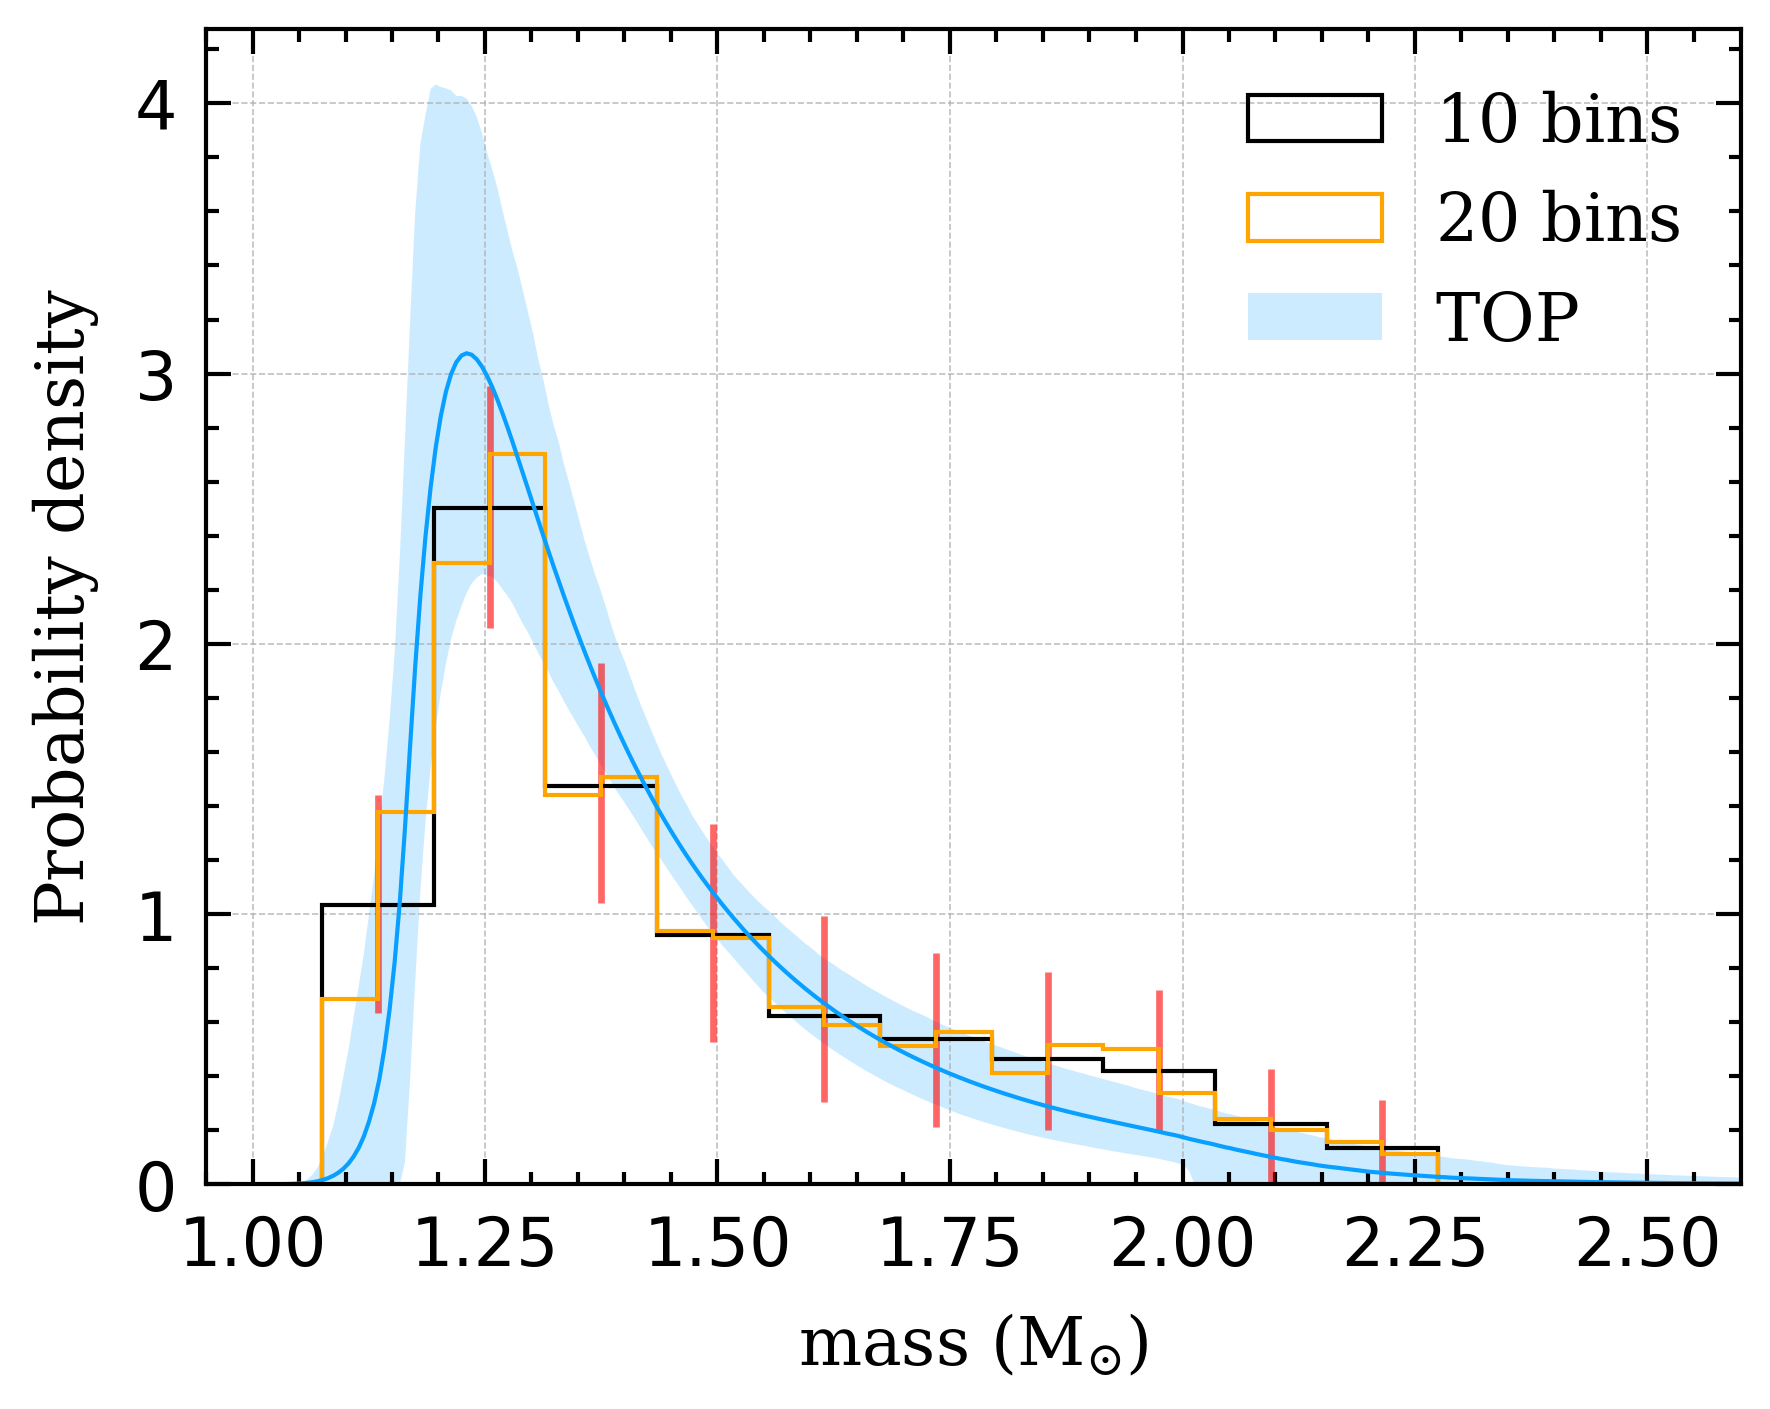

In [6]:
hfs_ppd_TOP=phe_ppd_TOP
hfs_err_TOP=phe_err_TOP
data_hfs   =data_phe

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.075
nbin=10


li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{TOP}$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')
plt.savefig('hist_ppd_err_phe.jpg')

# pow for datas

In [2]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##########
post_data_model_top={}
data_sets={}
i=3
for j in [2]:
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    re=bilby.result.read_in_result( fname )
    temp_post=((re.posterior).iloc[:,0:-2]).values 
    post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])]=temp_post
    
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_sets['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    
i=3 #top
mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
def ppd_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma = mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2]) 
        mar.append(ma) 
    return np.sum(np.array(mar),axis=0)/row

def errbar_top(x,pos_p):
    mar=list()
    row, col=pos_p.shape
    for i in range(row):
        ma=mass_model(np.array(x),pos_p[i,0],pos_p[i,1],pos_p[i,2]) 
        mar.append(ma)
    return np.quantile(np.array(mar),np.array([0.05 , 0.95]), axis=0)


mii=np.linspace(0.8,3,400)
i=3
j=2
phe_ppd_TOP=ppd_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
phe_err_TOP=errbar_top(mii,post_data_model_top["post_"+str(mrms_data_label[j])+'_'+str(sub_model_name_list[i])])
data_phe=data_sets['data_'+str(mrms_data_label[j])]

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


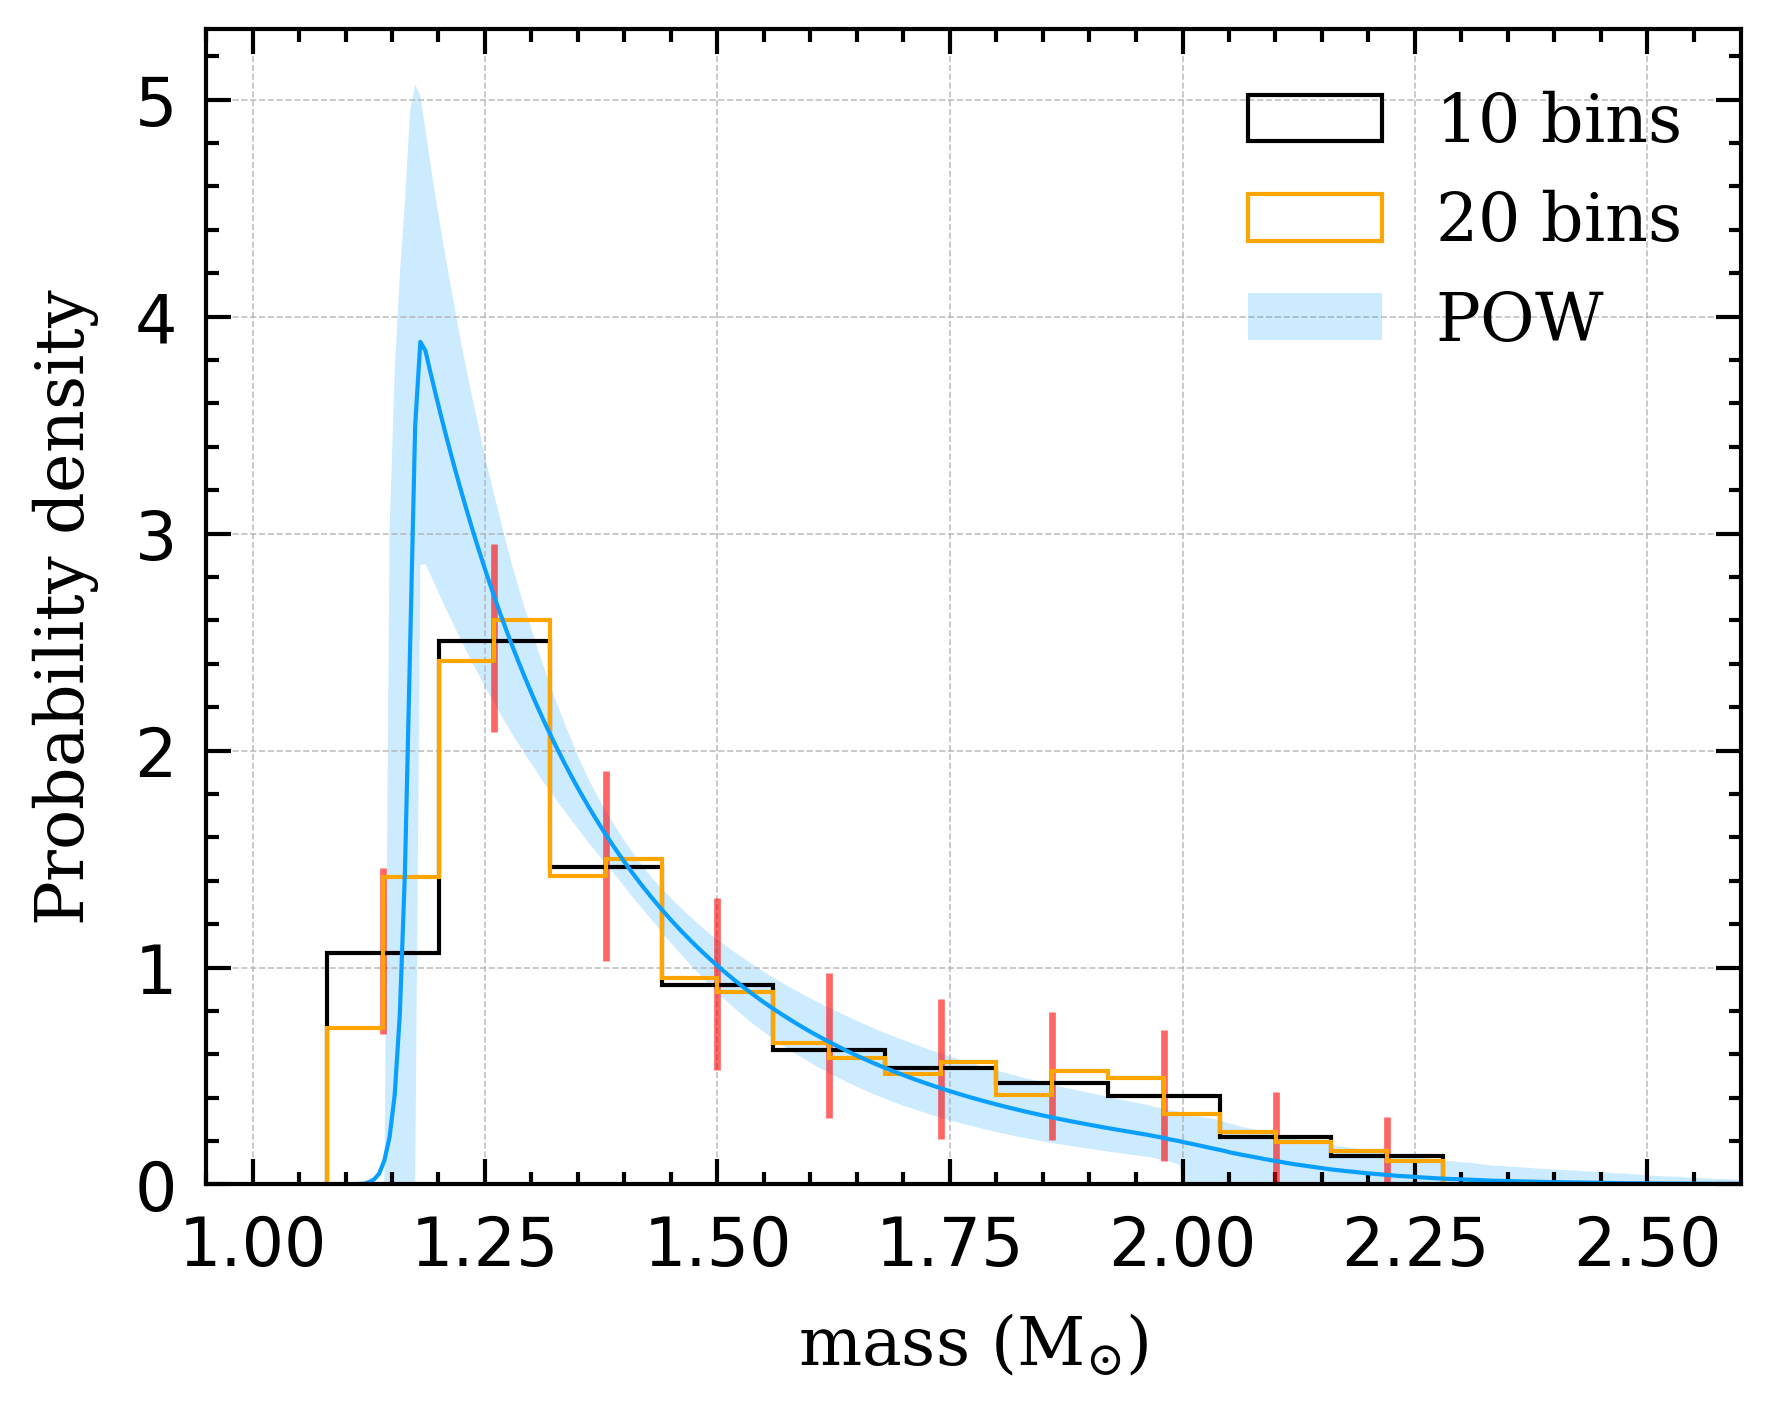

In [27]:
hfs_ppd_TOP=phe_ppd_TOP
hfs_err_TOP=phe_err_TOP
data_hfs   =data_phe

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.08
nbin=10
ra=0.99

li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{POW}$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')
plt.savefig('hist_ppd_err_pow_phe.jpg')

# hist for datas

In [102]:
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  

data_ns={}
for j in [0,1,2,3,4,5,6]:
    os.path.exists(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    data_names=glob.glob(main_direct + '{}.txt'.format(mrms_data_label[j]) )
    datname=data_names[0]
    data_ns['data_'+str(mrms_data_label[j])]=np.loadtxt(main_direct + '{}.txt'.format(mrms_data_label[j]) )

In [77]:
NN_j_0= int ( len( data_ns['data_'+str(mrms_data_label[0])] )/5000 )
m_mean_j_0=np.zeros(NN_j_0)
for i in range(NN_j_0):
    m_mean_j_0[i] = np.mean( data_ns['data_'+str(mrms_data_label[0])][i*5000:(i+1)*5000] )


In [106]:
data_ns_ana_plus_phe = np.concatenate( (data_ns['data_ana_corrected_mrms_87'] ,
                                      data_ns['data_phe_corrected_mrms_87'] ) )

In [108]:
np.savetxt('ana_plus_phe_mrms_174.txt',data_ns_ana_plus_phe)

In [113]:
len(data_ns_ana_plus_phe[::2])/5000

174.0

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


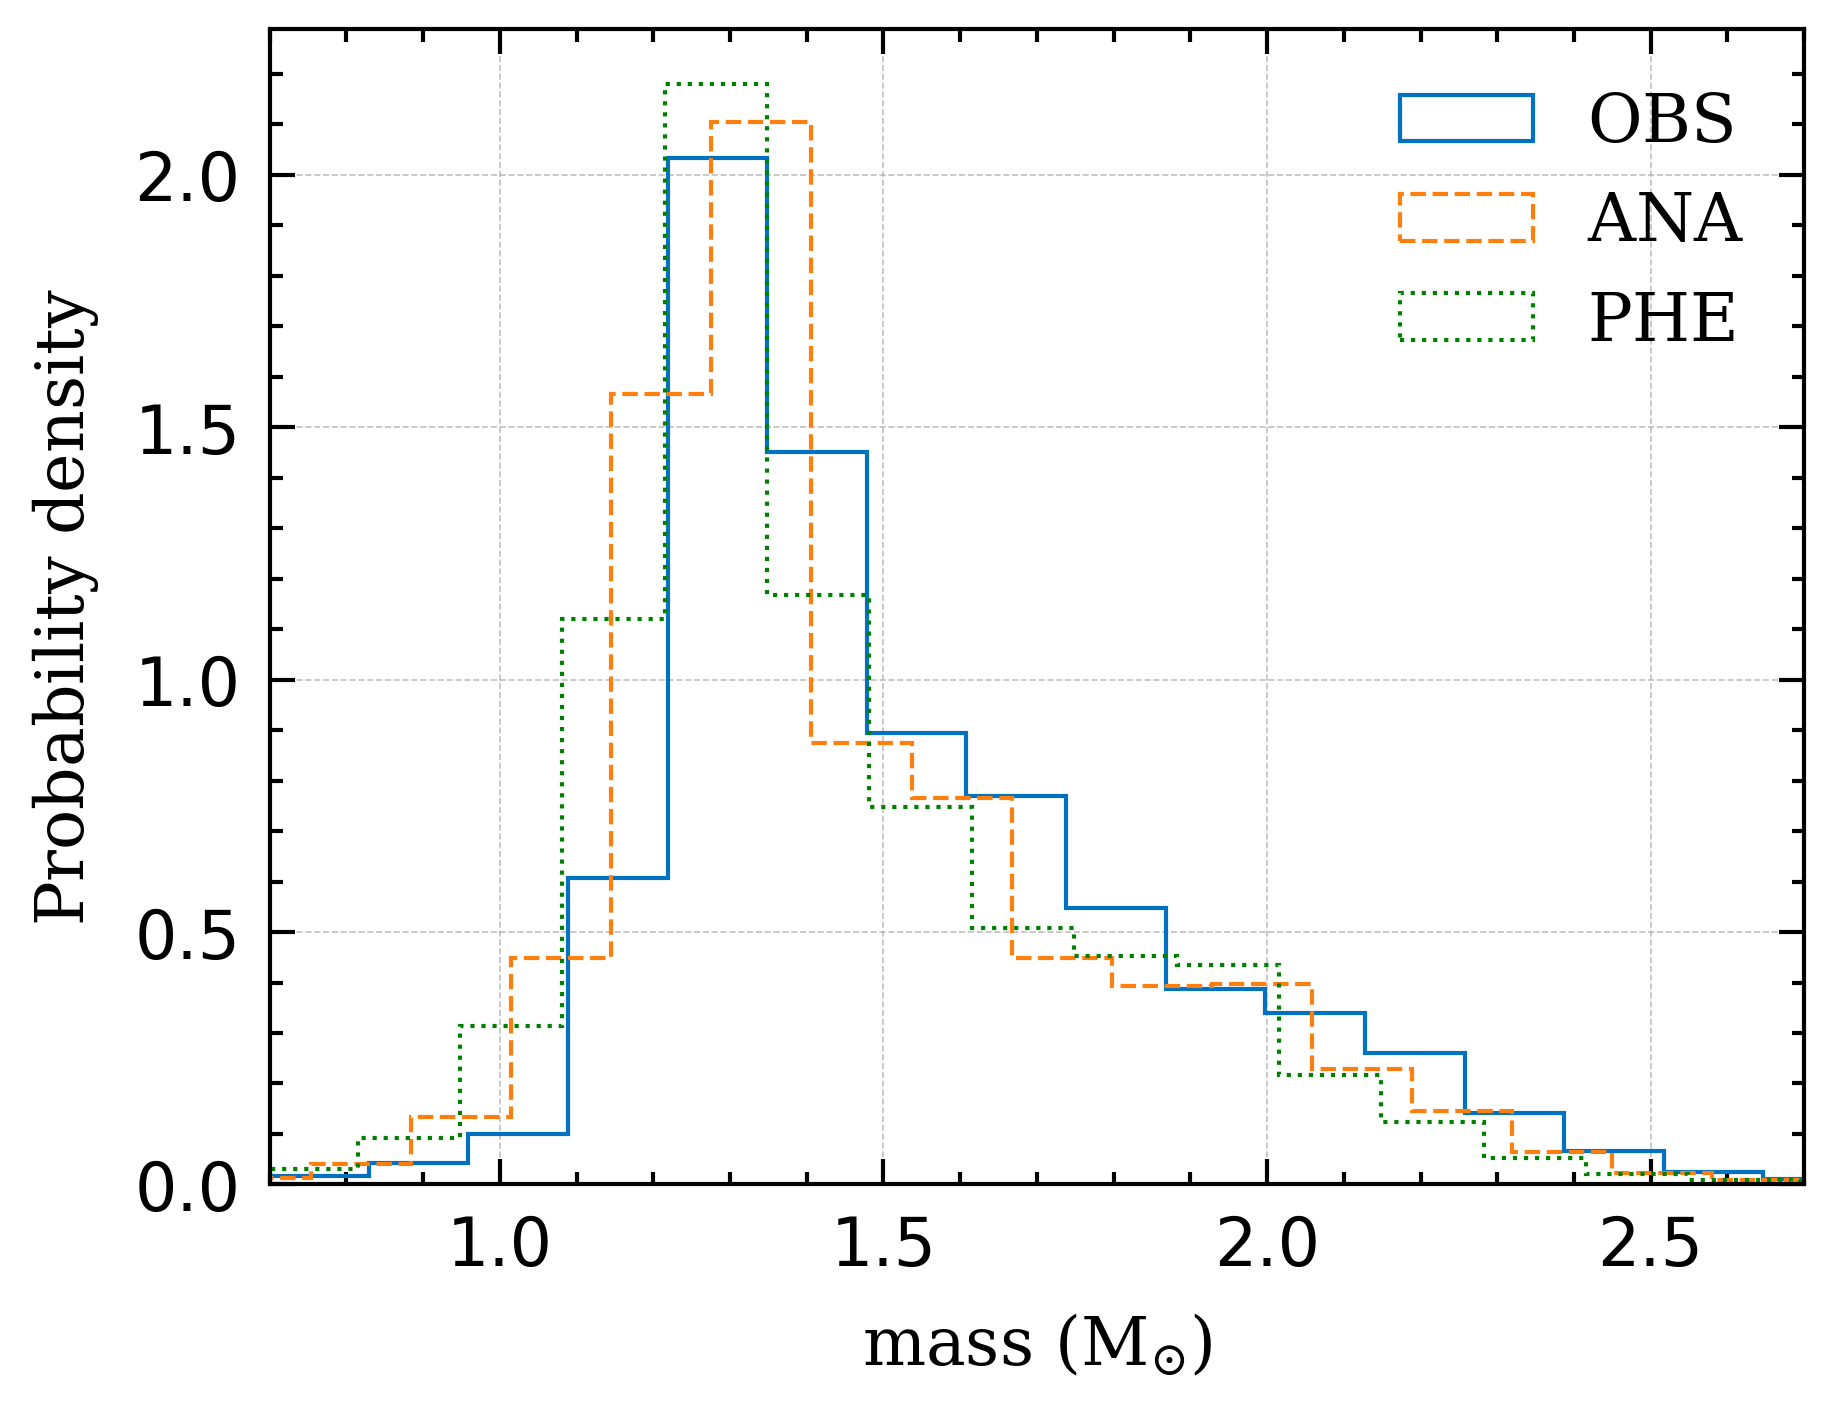

In [64]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

lss=['-','--',':',"dashdot", "dotted"]
colorss=['#0072c1','#ff7f0e','green','pink','black']
set_bins=np.linspace(1.07,2.4,20)
part_mrms_data_index=[0,1,2]
for j in part_mrms_data_index:
    plt.hist(data_ns['data_'+str(mrms_data_label[j])],bins=30,histtype='step',ls=lss[part_mrms_data_index.index(j)],\
             color=colorss[part_mrms_data_index.index(j)],lw=0.5,density=True,label=data_name_labes[j])
    
plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.legend(loc='upper right')
plt.xlim(0.7,2.7)   
plt.savefig('data_hist_{}.jpg'.format( np.array(data_name_labes)[part_mrms_data_index] ) )
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


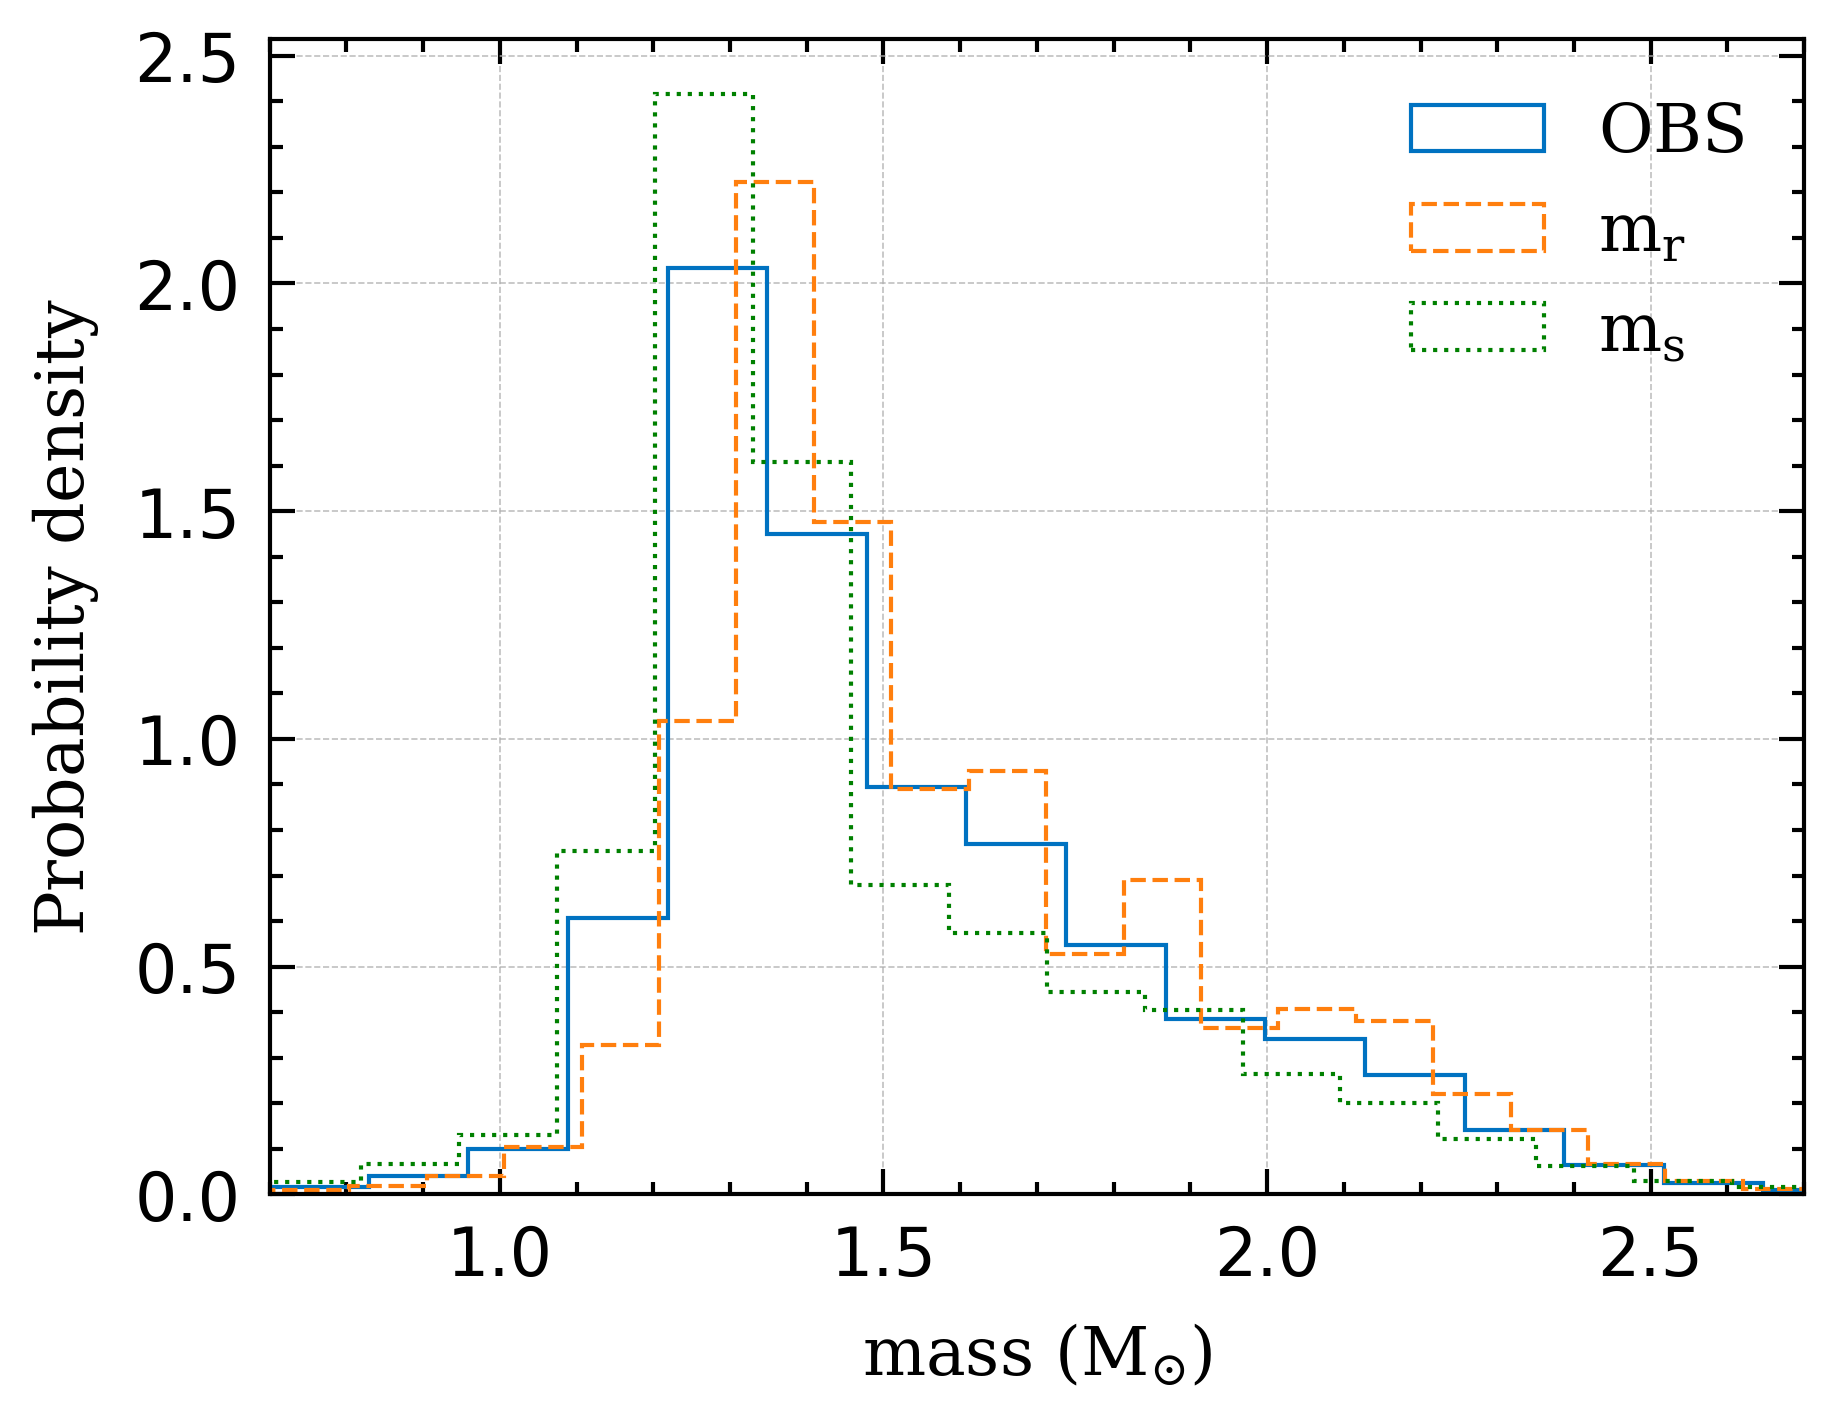

In [66]:
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

lss=['-','--',':',"dashdot", "dotted"]
colorss=['#0072c1','#ff7f0e','green','pink','black']
set_bins=np.linspace(1.07,2.4,20)
part_mrms_data_index=[0,5,6]
for j in part_mrms_data_index:
    plt.hist(data_ns['data_'+str(mrms_data_label[j])],bins=30,histtype='step',ls=lss[part_mrms_data_index.index(j)],\
             color=colorss[part_mrms_data_index.index(j)],lw=0.5,density=True,label=data_name_labes[j])
    
plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.legend(loc='upper right')
plt.xlim(0.7,2.7)   
plt.savefig('data_hist_{}.jpg'.format( np.array(data_name_labes)[part_mrms_data_index] ) )
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


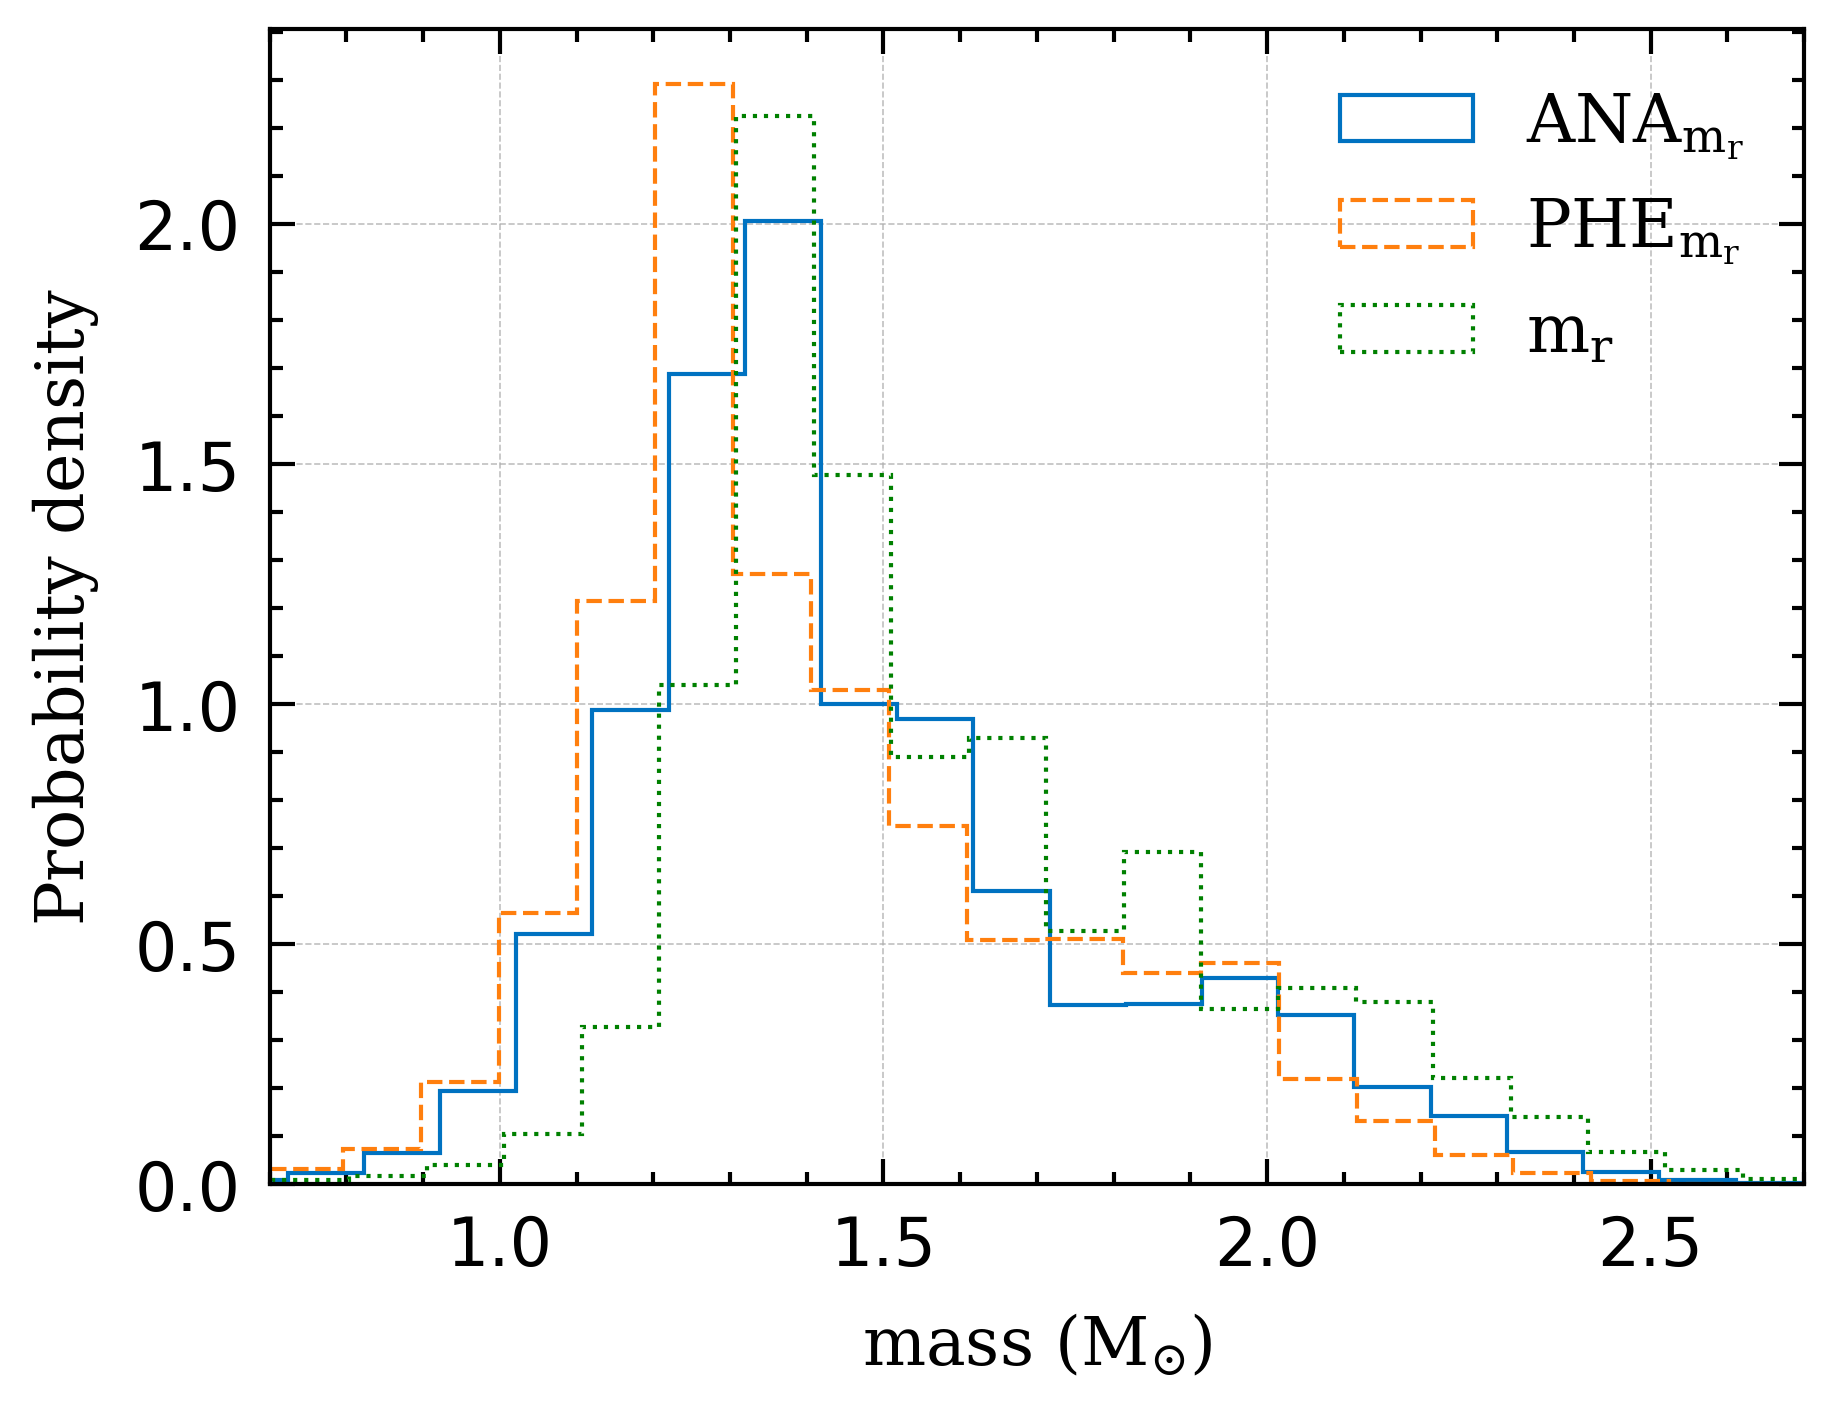

In [71]:
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

lss=['-','--',':',"dashdot", "dotted"]
colorss=['#0072c1','#ff7f0e','green','pink','black']
set_bins=np.linspace(1.07,2.4,20)
part_mrms_data_index=[3,4,5]
for j in part_mrms_data_index:
    plt.hist(data_ns['data_'+str(mrms_data_label[j])],bins=30,histtype='step',ls=lss[part_mrms_data_index.index(j)],\
             color=colorss[part_mrms_data_index.index(j)],lw=0.5,density=True,label=data_name_labes[j])
    
plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.legend(loc='upper right')
plt.xlim(0.7,2.7)   
plt.savefig('data_hist_{}.jpg'.format( np.array(data_name_labes)[part_mrms_data_index] ) )
plt.show()

# phe hist for pow sst 2G

In [75]:
import bilby
import os
import glob
mrms_data_label=['ns_obs','ana_corrected_mrms_87','phe_corrected_mrms_87','ana_corrected_mr_53','phe_corrected_mr_53','mr_obs_53','ms_34']
############# j=   0                1                       2                      3                       4                  5      6
sub_model_name_list=['turn_on_pow','turn_on_pow_fix','turn_on_pow_G','pow', '2G','turn_on_pow_G_fixed_max','G','2G_fixed_max', 'sst', 'G_fixed_max', '2G_fixed_min','2G_fixed_max_min','logu','3G_fixed_max_min','lognorm','gamma', 'U','G_fixed_max_min']
############ i=           0(4)       1(3)                2(7)         3(3)   4(7)            5(6)          6(4)       7(6)     8(4)        9(3)            10(6)              11(5)     12(2)      13(8)           14(2)    15(2)  16(2)      17(2)   
data_name_labes=[r'$\rm{OBS}$',r'$\rm{ANA}$',r'$\rm{PHE}$',r'$\rm{ANA_{m_r}}$',r'$\rm{PHE_{m_r}}$',r'$\rm{m_r}$',r'$\rm{m_s}$']
model_name_label=[r'$\rm{TOP}$',r'$\rm{TOP_{min}}$',r'$\rm{TOPG}$',r'$\rm{POW}$',r'$\rm{2G^{max}_{min}}$',r'$\rm{TOPG_{min}}$',r'$\rm{G^{max}_{min}}$',r'$\rm{2G_{min}}$',r'$\rm{SST}$',r'$\rm{G_{min}}$',r'$\rm{2G_{max}}$',r'$\rm{2G}$',r'$\rm{LogU}$',r'$\rm{3G}$',r'$\rm{LogN}$',r'$\rm{Gamma}$',r'$\rm{U}$',r'$\rm{G}$']
###########
main_direct='/home/yzq/Documents/NS_mass/BNU/NS_mass/NS_sci/NS_mass_2023/'
##############[0]90obs,[1]87ANA, [2]87PHE, [3]53ANA,[4]53PHE,[5]53Mr,[6]34Ms  
                   
j=2
sub_model_name_list=[0,4,8]
one_data_difmodel_maxl=list()
for i in range(len(sub_model_name_list)):
    os.path.exists(main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i]) )
    fnames= glob.glob( main_direct+'{}/{}/hy_outdir/*.json'.format(mrms_data_label[j],sub_model_name_list[i])  )
    fname=fnames[0]
    pos=bilby.result.read_in_result( fname )
    poss=np.array(pos.posterior.iloc[-1,:-2])
    one_data_difmodel_maxl.append(poss)
    
import utilizes_plot
import numpy as np
import matplotlib as mpl
import scienceplots
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])    
    
mii=np.linspace(0.7,3,200)

for i in range(len(sub_model_name_list)):
    mass_model=eval('utilizes_plot.hyper_prior_{}'.format(sub_model_name_list[i]) )
    y_models=mass_model(mii,*one_data_difmodel_maxl[i] ) 
    plt.plot(mii,y_models ,label=r'{}'.format(model_name_label[i]) )
    plt.grid( linestyle='--',lw=0.2,alpha=0.8)
    plt.xlim(1.05,2.4)
    plt.ylim(0,4)
    #plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlabel(r'$ \rm mass \,(M_\odot)$' )
    plt.ylabel(r'$\rm Probability\,density$')
    #plt.title('{}'.format(mrms_data_label[j]))

plt.show()

IndexError: list index out of range

In [ ]:
hfs_ppd_TOP=phe_ppd_TOP
hfs_err_TOP=phe_err_TOP
data_hfs   =data_phe

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
plt.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)

li_data=abs(data_hfs)
n_samp=10000
ne=int(len(data_hfs)/n_samp)
x=mii
dm=0.12
start_m=1.08
nbin=10
ra=0.99

li_hist_data=np.zeros((n_samp,ne))
li_all_hist=np.zeros((n_samp,nbin))
li_mean=np.zeros(ne)
for i in range(ne):
    li_hist_data[:,i] = li_data[i*n_samp:(i+1)*n_samp]
    li_mean[i]=np.mean(li_data[i*n_samp:(i+1)*n_samp])
    
standar_bins_edges=np.zeros(nbin+1)
for i in range(nbin+1):
    standar_bins_edges[i]= start_m + i*dm

for j in range(n_samp):
    yj,standar_bins_edgesj =np.histogram(li_hist_data[j,:],standar_bins_edges,density=1)
    li_all_hist[j,:]=yj

quan_data=np.zeros((3,nbin))
err_low_up=np.zeros((2,nbin))
quan_data=np.quantile(np.array(li_all_hist),np.array([0.05 , 0.95, 0.5]), axis=0)#1-sigma[0.16,0.84]


err_low_up[0,:]=quan_data[2,:] - quan_data[0,:]
err_low_up[1,:]=quan_data[1,:] - quan_data[2,:]


bins_wide=(standar_bins_edges[1] - standar_bins_edges[0])
bins_cen=standar_bins_edges[:-1]+(standar_bins_edges[1] - standar_bins_edges[0])/2

#plt.bar(bins_cen, quan_data[2,:], width=bins_wide, align='center', facecolor='none',edgecolor='k',lw=0.5,label=r'$\rm{Li21}$')
plt.errorbar(bins_cen, quan_data[2,:], yerr=err_low_up,fmt='none',color='r',lw=0.8,alpha=0.6) #or none for no line and ponits

##part 2
standar_bins_edges=np.zeros(11)
for i in range(10+1): #bins_edges more than one size compared bins
    standar_bins_edges[i]= start_m + i*dm
plt.hist(li_data,bins=standar_bins_edges,histtype='step',ls='-',color='black',lw=0.5,density=True,label=r'$\rm{10\,\,bins}$')

more_bins_edges=np.zeros(21)
for j in range(21):
    more_bins_edges[j]=start_m + j*(dm/2)
plt.hist(li_data,bins=more_bins_edges,histtype='step',ls='-',color='orange',lw=0.5,density=True,label=r'$\rm{20\,\,bins}$')


plt.plot(x, hfs_ppd_TOP, ls='-',color='#089FFF',lw=0.5)
plt.fill_between(x, hfs_err_TOP[0,:], hfs_err_TOP[1,:],alpha=0.2, facecolor='#089FFF',label=r'$\rm{POW}$')


plt.xlabel(r'$\rm{mass\,\, (M_{\odot})}$')
plt.ylabel(r'$\rm{Probability\,\,density}$')
plt.xlim(0.95,2.6)
#plt.ylim(0,0.6)
plt.legend(loc='upper right')
plt.savefig('hist_ppd_err_pow_phe.jpg')